In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
train=pd.read_csv(r'C:\Users\DeLL\Downloads\Train.csv')
test1=pd.read_csv(r'C:\Users\DeLL\Downloads\newtest.csv')

In [57]:
train.shape, test.shape

((8523, 12), (8523, 5))

In [58]:
train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [60]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [61]:
plt.figure(figsize=(10,6))

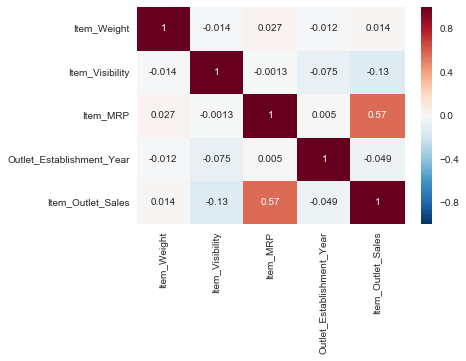

In [62]:
sns.heatmap(train.corr(),annot=True)

C:\Users\DeLL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


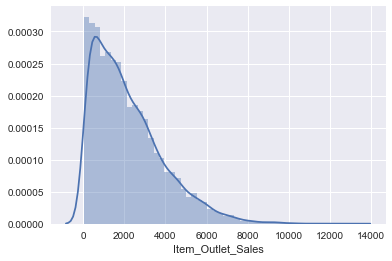

In [63]:
sns.distplot(train['Item_Outlet_Sales'])

In [64]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [65]:
plt.figure(figsize=(20,6))

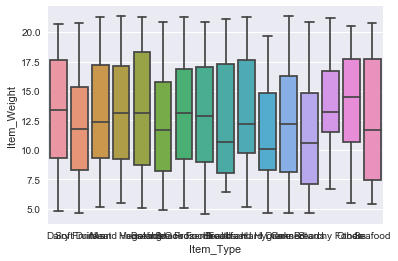

In [66]:
sns.boxplot(x='Item_Type', y='Item_Weight', data=train)

In [67]:
train['Item_Weight'][train['Item_Weight'].isnull()]=train['Item_Weight'].mean()

C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


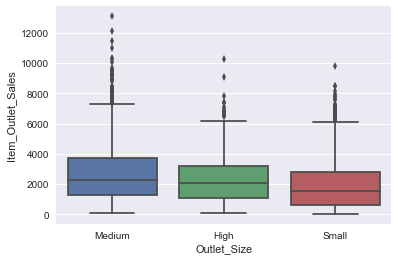

In [69]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

In [70]:
test=train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]

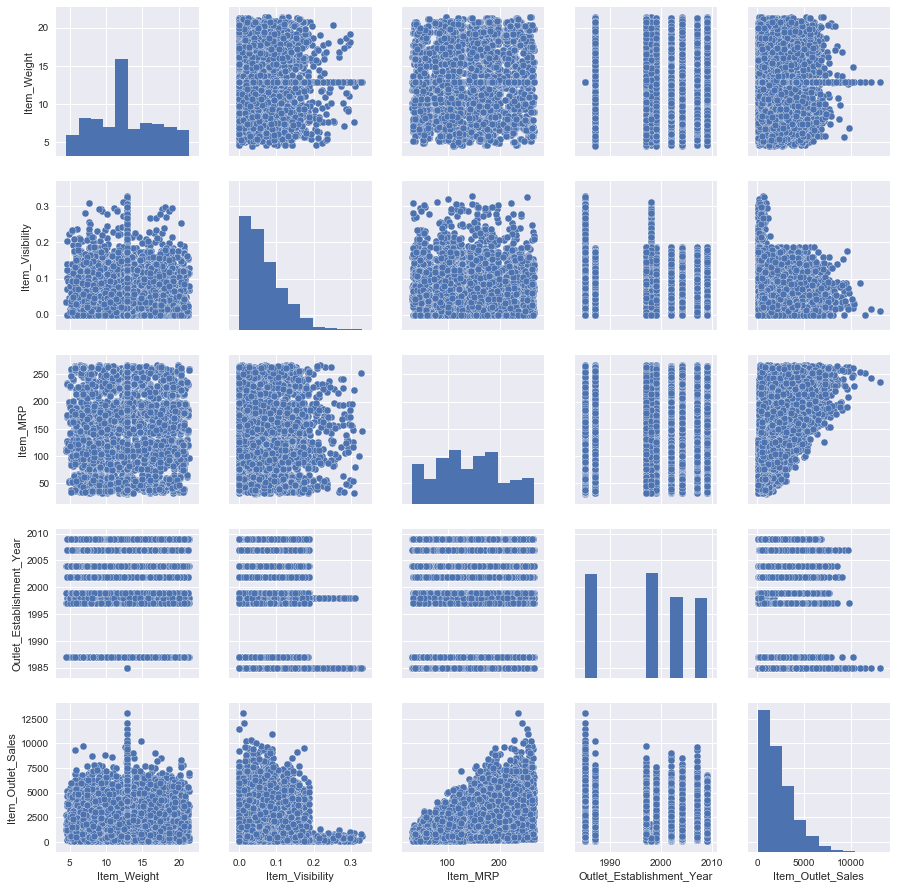

In [71]:
sns.pairplot(test)

In [37]:
from sklearn.cross_validation import train_test_split

C:\Users\DeLL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [72]:
X=test.drop(['Item_Outlet_Sales'],axis=1)
y=test['Item_Outlet_Sales']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=105)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model=LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
print(model.intercept_)

27764.5535427


In [78]:
print(model.coef_)

[   -5.76906086 -4533.85252827    15.61965466   -13.7182071 ]


In [79]:
cdf=pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

In [80]:
cdf

,Coeff
Item_Weight,-5.769061
Item_Visibility,-4533.852528
Item_MRP,15.619655
Outlet_Establishment_Year,-13.718207


C:\Users\DeLL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


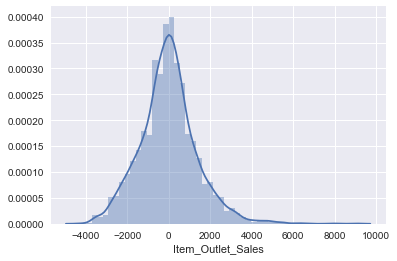

In [81]:
sns.distplot(y_test-predictions)

In [82]:
predictions=model.predict(X_test)

In [83]:
predictions

array([ 2604.20879243,  1932.53283172,  1688.15766043, ...,  3844.68718048,
        2251.79959129,  1696.52797497])

In [84]:
from sklearn import metrics

In [85]:
metrics.mean_absolute_error(y_test,predictions)

1033.1779577959715

In [86]:
metrics.mean_squared_error(y_test,predictions)

1926432.451110736

In [87]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1387.959816100861

In [88]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [89]:
plt.figure(figsize=(20,6))

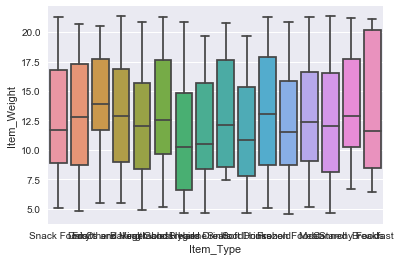

In [90]:
sns.boxplot(x='Item_Type', y='Item_Weight', data=test1)

In [91]:
test1['Item_Weight'][test1['Item_Weight'].isnull()]=test1['Item_Weight'].mean()

C:\Users\DeLL\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


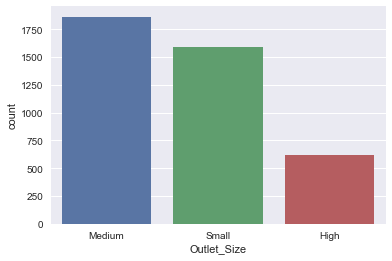

In [92]:
sns.countplot('Outlet_Size',data=test1)

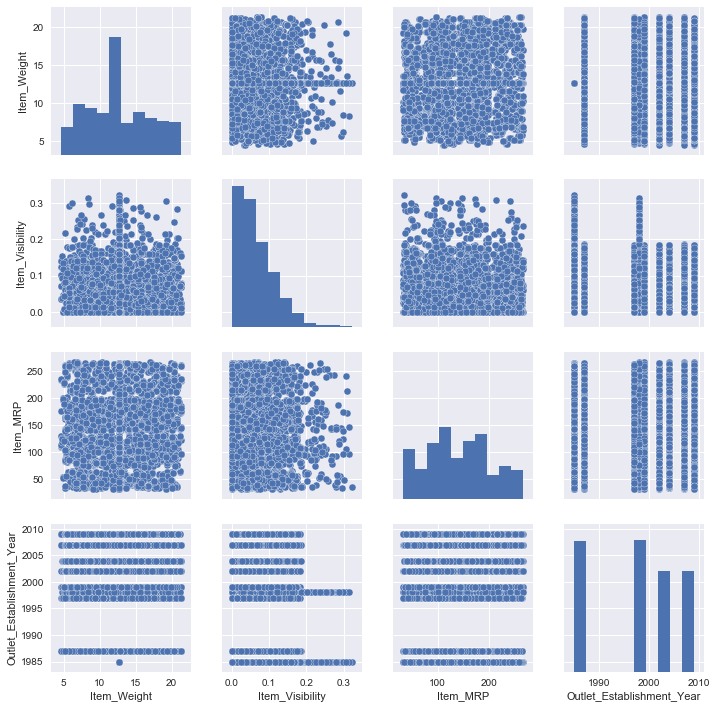

In [94]:
sns.pairplot(test1)

In [95]:
test2=test1[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

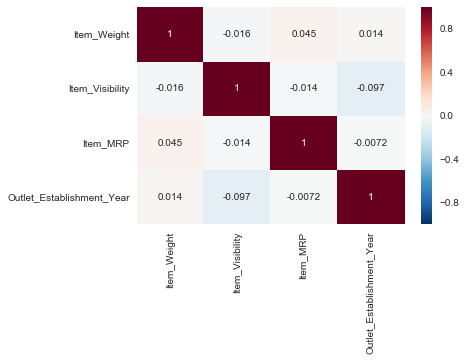

In [96]:
sns.heatmap(test2.corr(),annot=True)

In [97]:
X1=test2

In [98]:
test1['Item_Outlet_Sales']=model.predict(X1)

In [99]:
test1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1872.621992
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1373.908380
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,3596.000380
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2541.720040
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3581.550471
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,1853.249406
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,501.138760
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3,1655.231765
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1,1200.490220
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1,3090.942938


In [100]:
data_frame=test1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [103]:
data_frame.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1872.621992
1,FDW14,OUT017,1373.908380
2,NCN55,OUT010,3596.000380
3,FDQ58,OUT017,2541.720040
4,FDY38,OUT027,3581.550471


In [102]:
data_frame.to_csv('Big Market Sales.csv ',index=0)